# Random Forest Trading

---

### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\TribThapa\anaconda3\envs\algotrading\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\TribThapa\anaconda3\envs\algotrading\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

### Read in X-Test CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 15\3\03-Ins_Random_Forest_Trading\Resources\x_test.csv')

x_test=pd.read_csv(csv_path)

x_test.set_index(pd.to_datetime(x_test['Timestamp'], 
                                infer_datetime_format=True), 
                 inplace=True)

x_test.drop(columns=['Timestamp'], 
            inplace=True)

x_test.head()

,crossover_signal,vol_trend_signal,bollinger_signal
Timestamp,,,
2019-09-15 00:00:00+00:00,1.0,1.0,0.0
2019-09-15 01:00:00+00:00,1.0,1.0,0.0
2019-09-15 02:00:00+00:00,1.0,1.0,0.0
2019-09-15 03:00:00+00:00,1.0,1.0,0.0
2019-09-15 04:00:00+00:00,-1.0,1.0,0.0


### Read in Y-Test CSV (Actual Results) as Pandas DataFrame

In [3]:
# Set path to CSV and read in CSV
csv_path = Path(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 15\3\03-Ins_Random_Forest_Trading\Resources\results.csv')

results = pd.read_csv(csv_path)

results.set_index(pd.to_datetime(results['Timestamp'], 
                                 infer_datetime_format=True),
                  inplace=True)

results.drop(columns=['Timestamp'],
             inplace=True)

results.head()

,Return,Actual Value
Timestamp,,
2019-09-15 00:00:00+00:00,-0.002268,0
2019-09-15 01:00:00+00:00,0.001944,1
2019-09-15 02:00:00+00:00,-0.001602,0
2019-09-15 03:00:00+00:00,-0.001769,0
2019-09-15 04:00:00+00:00,0.000920,1


### Load Model and Predict Y-Values from X-Test Values

In [4]:
# Load the model and make the predictions from the x test dataset
model = load(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 15\3\03-Ins_Random_Forest_Trading\Resources\random_forest_model.joblib')

predictions = model.predict(x_test)            

predictions

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1.

### Compare Predicted Results to Y-Test (Actual Results)

In [8]:
# Add predicted results to DataFrame
results["Pred Value"] = predictions

results

,Return,Actual Value,Pred Value
Timestamp,,,
2019-09-15 00:00:00+00:00,-0.002268,0,0.0
2019-09-15 01:00:00+00:00,0.001944,1,0.0
2019-09-15 02:00:00+00:00,-0.001602,0,0.0
2019-09-15 03:00:00+00:00,-0.001769,0,0.0
2019-09-15 04:00:00+00:00,0.000920,1,1.0
...,...,...,...
2019-09-25 12:00:00+00:00,-0.003957,0,1.0
2019-09-25 13:00:00+00:00,0.009933,1,1.0
2019-09-25 14:00:00+00:00,-0.001097,0,1.0


### Plot Predicted Results vs. Actual Results

<AxesSubplot:xlabel='Timestamp'>

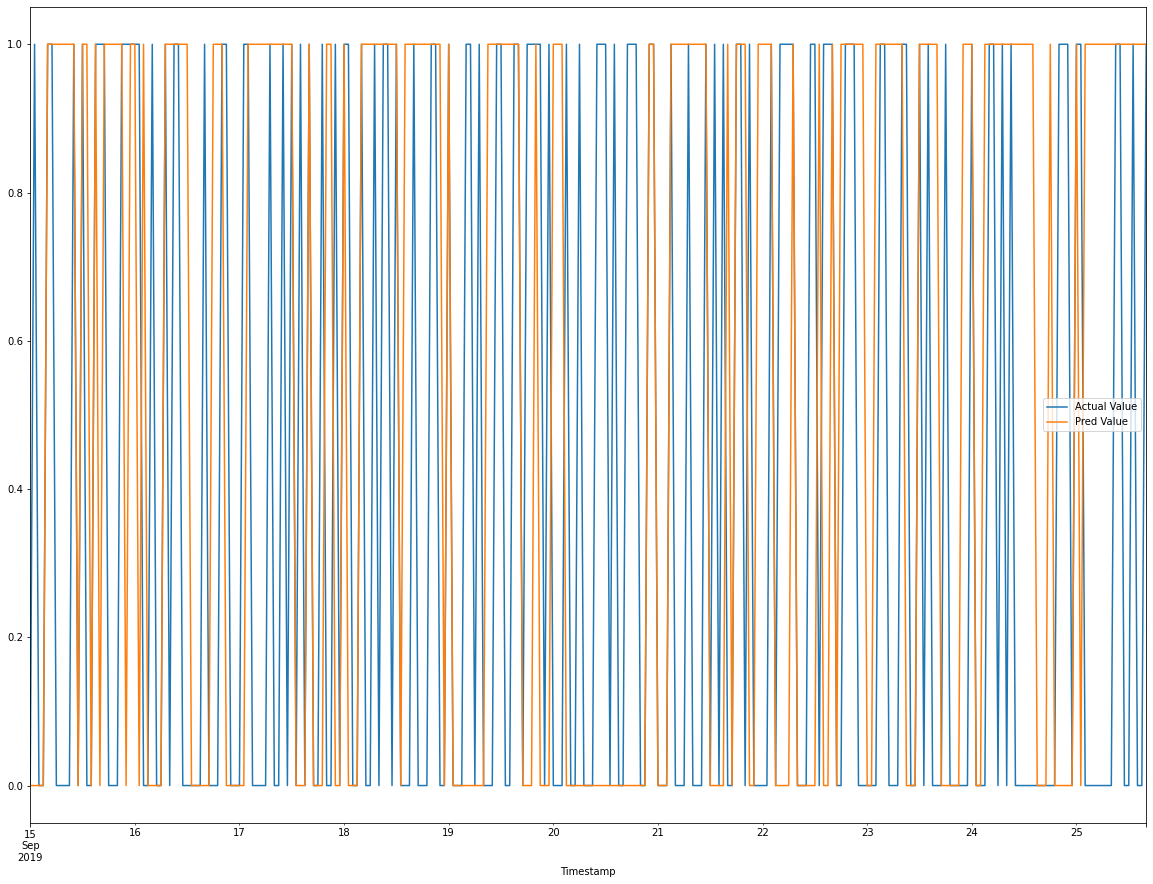

In [9]:
# Plot predicted results vs. actual results
results[["Actual Value", "Pred Value"]].plot(figsize=(20, 15))

### Plot Predicted Results vs. Actual Results (of last 10 records)

<AxesSubplot:xlabel='Timestamp'>

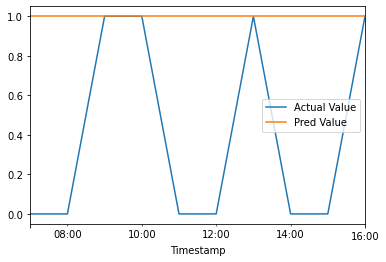

In [11]:
# Plot last 10 records of predicted vs. actual results
results[["Actual Value", "Pred Value"]].tail(10).plot()

### Replace Predicted Values 0 as -1 (For Shorting)

In [12]:
# Replace predicted values 0 to -1 to account for shorting
results["Pred Value"].replace(0, -1, inplace=True)

results

,Return,Actual Value,Pred Value
Timestamp,,,
2019-09-15 00:00:00+00:00,-0.002268,0,-1.0
2019-09-15 01:00:00+00:00,0.001944,1,-1.0
2019-09-15 02:00:00+00:00,-0.001602,0,-1.0
2019-09-15 03:00:00+00:00,-0.001769,0,-1.0
2019-09-15 04:00:00+00:00,0.000920,1,1.0
...,...,...,...
2019-09-25 12:00:00+00:00,-0.003957,0,1.0
2019-09-25 13:00:00+00:00,0.009933,1,1.0
2019-09-25 14:00:00+00:00,-0.001097,0,1.0


### Plot Cumulative Returns of Random Forest Model

<AxesSubplot:xlabel='Timestamp'>

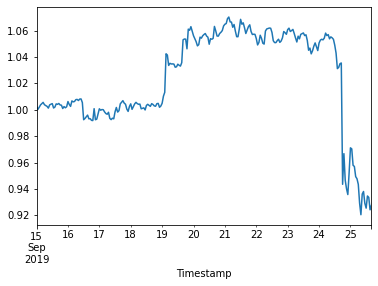

In [13]:
# Calculate cumulative return of model and plot the result
cum_results = (1 + (results["Return"] * results["Pred Value"])).cumprod()

cum_results.plot()

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

<AxesSubplot:xlabel='Timestamp'>

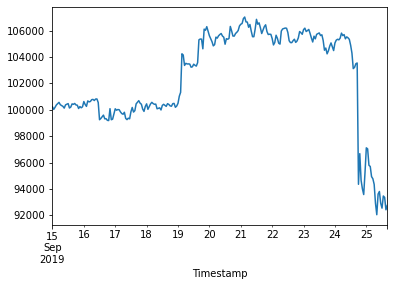

In [14]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cum_ret_capital = initial_capital * cum_results

cum_ret_capital.plot()

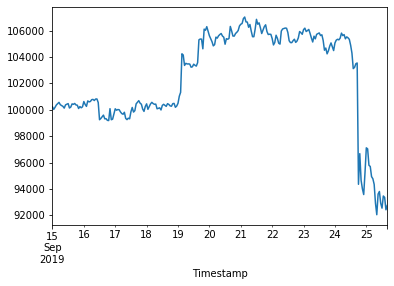